### LeNet-5 Demonstration and OCR Implementation using LeNet-5

The LeNet-5 architecture is a pioneering convolutional Neural Network (CNN) designed by Yann LeCun et al. in 1998. It was specifically developed for handwritten digit recognition tasks, such as the recognition of characters in the MNIST dataset. LeNet-5 played a significant role in popularizing deep learning and CNNs.

The architecture of LeNet-5 consists of seven layers, including three convolutional layers, two average pooling layers, and two fully connected layers. Here's a brief description of each layer:\
\
Convolutional Layer 1: The first layer applies six filters of size 5x5 to the input image. The filters extract low-level features and generate six feature maps.\


Average Pooling Layer 1: A 2x2 average pooling layer follows the first convolutional layer. It reduces the spatial dimensions of the feature maps while preserving the important features.\
\
Convolutional Layer 2: The second layer applies 16 filters of size 5x5 to the output of the first pooling layer. It extracts higher-level features and generates 16 feature maps.\
\
Average Pooling Layer 2: Another 2x2 average pooling layer follows the second convolutional layer, further reducing the spatial dimensions.\
\
Flatten Layer: The output of the second pooling layer is flattened into a vector to be fed into the fully connected layers.\
\
Fully Connected Layer 1: This layer consists of 120 neurons and applies the rectified linear unit (ReLU) activation function. It learns complex combinations of features.\
\
Fully Connected Layer 2: The final fully connected layer has 84 neurons with ReLU activation. It further processes the learned features.

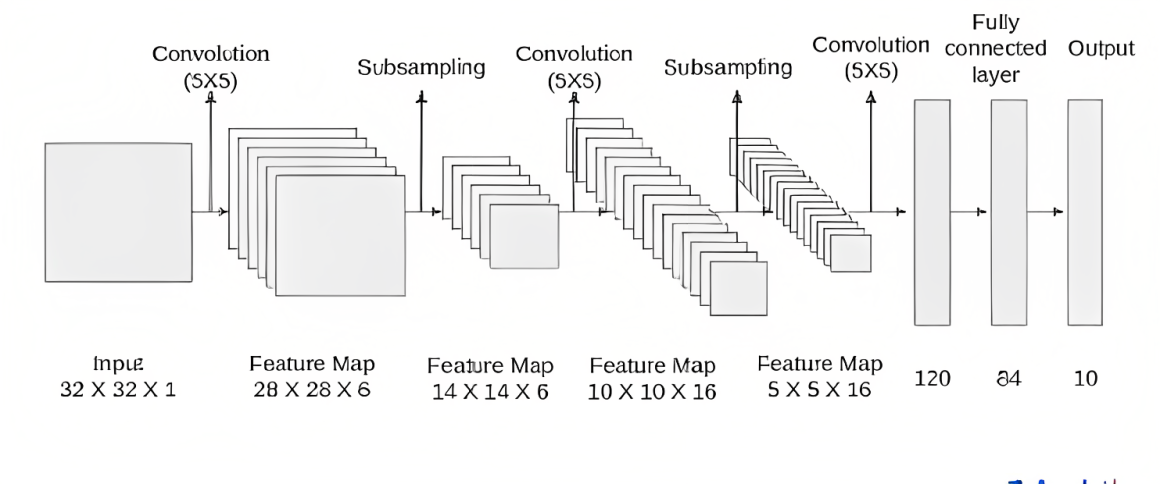

<center> <h3> Architecture of LeNet-5 </h3> </center>

### Implementation of LeNet-5

#### Importing the Required Packages

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

#### Data Loading and Data Pre-Processing

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess input data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

# Preprocess class labels
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

#### Building LeNet-5 Model

In [3]:
# Build LeNet-5 model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

C:\Users\Charan Lanka\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### Model Training

In [4]:
# Train the model
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 16s 32ms/step - loss: 1.2989 - accuracy: 0.5982 - val_loss: 0.4441 - val_accuracy: 0.8662
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.3969 - accuracy: 0.8824 - val_loss: 0.3362 - val_accuracy: 0.9035
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.3069 - accuracy: 0.9099 - val_loss: 0.2693 - val_accuracy: 0.9193
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.2548 - accuracy: 0.9243 - val_loss: 0.2355 - val_accuracy: 0.9304
Epoch 5/10
469/469 [==============================] - 15s 31ms/step - loss: 0.2190 - accuracy: 0.9349 - val_loss: 0.1978 - val_accuracy: 0.9405
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1934 - accuracy: 0.9425 - val_loss: 0.1785 - val_accuracy: 0.9445
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1727 - accuracy: 0.9487 - val_loss: 0.1433 - val_accuracy:

#### Model Evaluation

In [5]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.1152 - accuracy: 0.9640
Accuracy: 0.9639999866485596


#### Predictions made using LeNet-5

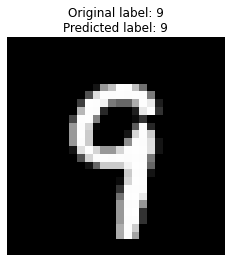

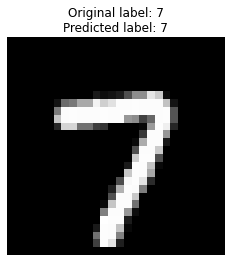

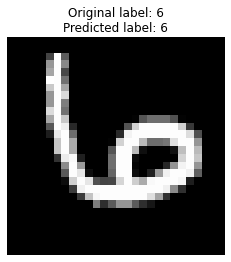

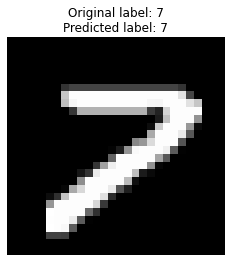

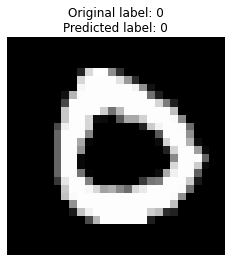

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict(x_test)

# Display original label and predicted label for a few images
num_images = 5
random_indices = np.random.randint(0, x_test.shape[0], num_images)

for idx in random_indices:
    # Original label
    original_label = np.argmax(y_test[idx])

    # Predicted label
    predicted_label = np.argmax(predictions[idx])

    # Display the image and labels
    image = x_test[idx].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Original label: {original_label}\nPredicted label: {predicted_label}")
    plt.axis('off')
    plt.show()
